<a href="https://colab.research.google.com/github/Andrebarbosalima/Classifica-o-Valida-o-de-modelos-e-m-tricas-de-avalia-o/blob/main/Balanceamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/emp_automovel.csv')

In [3]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [4]:
x = dados.drop('inadimplente', axis =1)
y = dados['inadimplente']

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [7]:
print(f'Acurácia: {modelo.score(x,y)}')

Acurácia: 1.0


### Validando o modelo

Avaliar os modelo com base nos mesmos dados usados no treinamento não é interessante. É preciso que a avaliação seja feita em dados independentes.

Avaliar o modelo nos próprios dados de treinamento seria o análogo a entregar uma prova com as questões e o gabarito para uma pessoa e no momento de avaliá-la novamente, entregar uma prova com as mesmas questões e alternativas. É esperado que essa pessoa se sairá bem por já ter visto as respostas e ter decorado o resultado. Isso é diferente de ter aprendido a matéria a partir daquela prova e depois fazer uma prova com conteúdo parecido e ter um resultado positivo.

No intuito de checar a generalização de um modelo, devemos separar o conjunto de dados em 3 partes: dados de treinamento, validação e teste.

- o conjunto de treinamento é utilizado para treinar os modelos. Os modelos vão entender o padrão dos dados a partir desse conjunto de dados.

- o conjunto de validação é utilizado para avaliar o desempenho de diferentes modelos, com dados novos que não foram usados no treinamento do modelo.

- o conjunto de teste fica separado dos demais desde o momento inicial para simular os dados do mundo real. Ele não é utilizado em nenhum momento no treinamento e nem na validação, servindo como uma estimativa da capacidade do modelo escolhido de generalizar e prever novos dados.

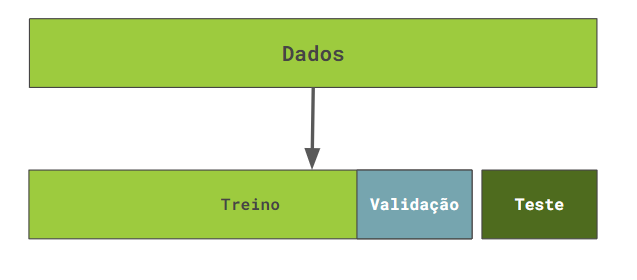

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [10]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8497517637836426


In [11]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9205865272938444
Acurácia de validação: 0.9059315390645414


### Avaliando o modelo

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10361   118]
 [  962    40]]


In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

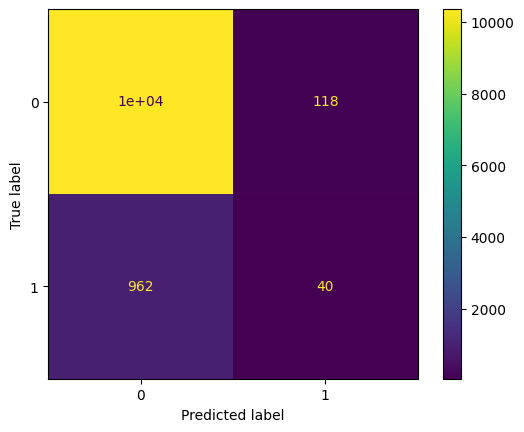

In [15]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

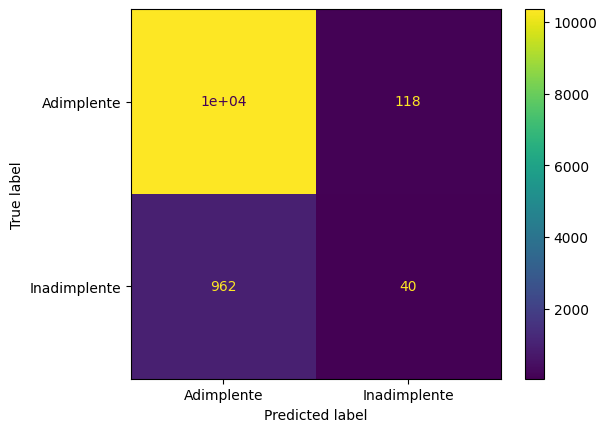

In [16]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

## <font color='dark'>Métricas de avaliação</h1>

### Acurácia, precisão e recall

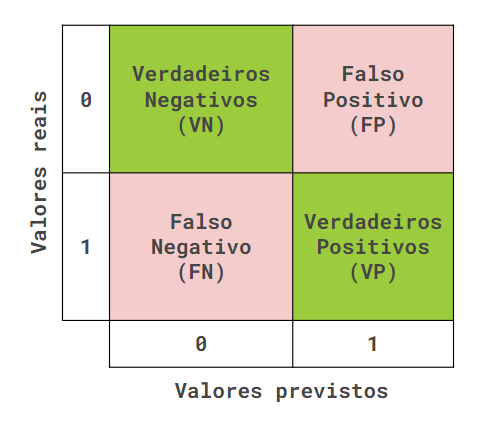

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9059315390645414


In [19]:
from sklearn.metrics import precision_score, recall_score

In [20]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Revocação: {recall_score(y_val, y_previsto)}')

Precisão: 0.25316455696202533
Revocação: 0.03992015968063872


In [21]:
from sklearn.metrics import f1_score

In [22]:
print(f'F1-score: {f1_score(y_val, y_previsto)}')

F1-score: 0.06896551724137931


### Curva ROC

In [23]:
from sklearn.metrics import RocCurveDisplay

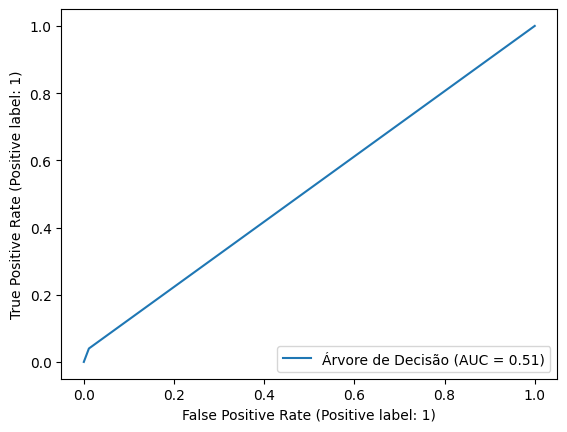

In [24]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5143297716048006


### Curva de precisão x recall

In [27]:
from sklearn.metrics import PrecisionRecallDisplay

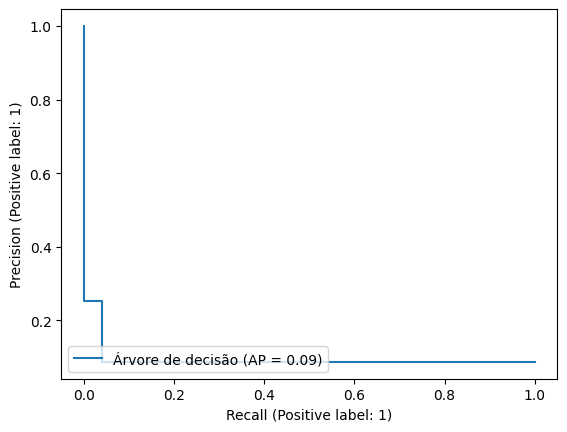

In [28]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

In [29]:
from sklearn.metrics import average_precision_score

In [30]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.09389698011339402


### Relatório de métricas

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'>Validação cruzada</h1>

### Usando o KFold

A validação do modelo de classificação a partir da separação dos dados em conjunto de treino e validação faz com que o resultado seja muito dependente dessa divisão dos dados e pode ser que, de forma aleatória, o padrão dos dados de validação sejam diferentes do padrão dos dados de treinamento, levando a sorte de ter um resultado muito melhor do que a realidade ou o azar de um resultado muito pior do que a realidade.

Levando isso em consideração, é possível utilizar a **validação cruzada**, uma estratégia mais consistente e bem mais utilizada nos projetos de machine learning.

Na validação cruzada, ao invés de separarmos os dados em apenas treino e validação uma única vez, dividimos os dados em várias partes de mesmo tamanho. Em cada uma dessas divisões, será utilizada uma parte para validação e todas as outras para treinamento e o processo se repete até que todas as partes sejam utilizadas para validação e o restante para treinamento.

Será gerado um modelo para cada uma dessas divisões e a avaliação de desempenho será feita tirando a média da métrica de cada modelo. Isso faz com que a dependência da separação dos dados seja eliminada, já que há uma variação maior da escolha dos dados e é retirada uma média.

Geralmente são utilizadas 5 ou 10 partes, mais do que isso não é tão necessário porque necessita de um processamento maior e valores menores já mitiga o problema da escolha dos dados.

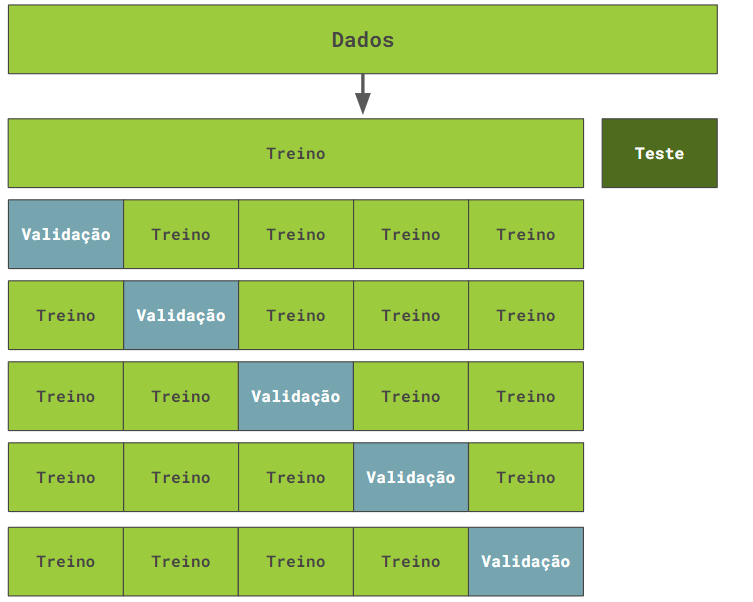

In [33]:
from sklearn.model_selection import cross_validate, KFold

In [34]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.25184178, 0.23494983, 0.23599648, 0.21906376, 0.21921206]),
 'score_time': array([0.00496483, 0.00723314, 0.00456762, 0.0046773 , 0.00426507]),
 'test_score': array([0.91322809, 0.90788328, 0.90744774, 0.9135453 , 0.8997169 ])}

In [35]:
cv_resultados['test_score']

array([0.91322809, 0.90788328, 0.90744774, 0.9135453 , 0.8997169 ])

In [36]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.8983104760768333, 0.9184180418635292]


### Validação cruzada com recall

In [37]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [38]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.23680544, 0.23218346, 0.21678376, 0.21693158, 0.22213507]),
 'score_time': array([0.00752211, 0.00976825, 0.00723457, 0.0094552 , 0.00696301]),
 'test_score': array([0.02509908, 0.01980198, 0.0196802 , 0.01436031, 0.02312139])}

In [39]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.01310013411922558, 0.027725047039325462]


### Estratificando os dados

In [40]:
dados['inadimplente'].value_counts(normalize = True)

0    0.912707
1    0.087293
Name: inadimplente, dtype: float64

In [41]:
from sklearn.model_selection import StratifiedKFold

In [42]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring = 'recall')

In [43]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.021586425818664635, 0.03777889371645512]


## <font color='dark'>Balanceamento de dados</h1>

### Oversampling

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [46]:
y_balanceado.value_counts(normalize = True)

0    0.5
1    0.5
Name: inadimplente, dtype: float64

In [47]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv = skf, scoring = 'recall')

In [48]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.700884888126229, 0.7492002380222839]


### Pipeline para validação

Nós utilizamos uma estratégia para balancear nossos dados com base na variável alvo de clientes inadimplentes. Contudo, o processo de validação cruzada está sendo realizado em dados balanceados. Isso representa um problema, já que os dados do mundo real não são balanceados.

Essa estratégia deve ser aplicada somente para o modelo aprender o padrão dos dados. No momento de avaliar esse modelo, para verificar se está ou não acertando, precisamos avaliar em dados desbalanceados.

Então, como podemos implementar o processo de balanceamento de dados em conjunto com a validação cruzada?

Vamos precisar utilizar um pipeline de dados. Um pipeline é uma sequência de transformações, operações que realizamos nos dados.

Queremos colocar o processo de transformação do oversampling em conjunto ao modelo. Dessa forma, quando passarmos esse pipeline para validação cruzada, primeiramente será feita a separação dos dados e, em cada conjunto de dados que foi separado para validação e treinamento, o equilíbrio dos dados será feito somente com base nos respectivos dados.

A partir disso, no momento de validar os dados, os dados de validação não estarão balanceados. Eles vão estar na forma como são encontrados no mundo real. Assim, teremos uma validação correta, avaliando o desempenho dos dados que funcionam como o mundo real.

Pipeline de validação
Como construímos esse pipeline? A própria biblioteca imblearn possui uma função para aplicar esse pipeline. Vamos utilizá-la, pois estamos aplicando o processo de oversampling dessa biblioteca.

A scikit-learn também tem um método de pipeline, mas não vai funcionar aqui porque os procedimentos de transformação do scikit-learn funcionam de forma um pouco diferente do oversampling da biblioteca imblearn. Logo, vamos utilizar o pipeline dessa biblioteca por conta disso.

Na primeira célula, escrevemos from imblearn.pipeline para importar o método Pipeline com a letra "P" em maiúscula com o apelido imbpipeline.

Com esse apelido, identificamos que utilizaremos o pipeline do imblearn e evitamos confusões em outros projetos que venham a utilizar outros pipelines distintos.

In [50]:
from imblearn.pipeline import Pipeline as imbpipeline

over-sampling, por sua vez, consiste em gerar novos exemplos para a classe minoritária, de forma a aumentar sua representatividade no conjunto de dados.

Oversampling
Para oversampling, utilizaremos o SMOTE, que é uma técnica amplamente utilizada em problemas de classificação em que a classe minoritária é significativamente menor do que a classe majoritária. A técnica funciona selecionando um exemplo da classe minoritária e encontrando os seus k vizinhos mais próximos. Em seguida, ela cria novos exemplos sintéticos interpolando aleatoriamente os atributos dos exemplos selecionados e adicionando-os ao conjunto de dados.

In [51]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

Ao executar essa célula já criamos o pipeline. Esse pipeline aplica primeiro o SMOTE nos dados e, em seguida, aplica o modelo.

Agora, vamos utilizar o processo de validação cruzada, da mesma forma que já conhecemos, mas, ao invés de passar o modelo, vamos passar o pipeline.

Para isso, podemos copiar o trecho de código que utilizamos para inicializar o StratifiedKFold() e o cv_resultados. Em uma célula vazia, vamos colar e fazer uma alteração.

Ao invés de colocar o modelo dentro do cross_validate(), passamos o pipeline. E como não estamos utilizando diretamente os dados de x_balanceado e y_balanceado, passamos somente x e y.

In [52]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

Dessa maneira, o pipeline executará primeiro o SMOTE em x e y para cada uma das partições que foi feita no StratifiedKFold. Só depois disso, aplicará o modelo em cada uma dessas partes que estão balanceadas.

No processo de validação, será validado em dados não balanceados, ou seja, teremos um resultado mais justo, mais consistente e não tão otimista.

Vamos executar essa célula e, na próxima, vamos calcular o intervalo de confiança. Isto é, intervalo_conf(), passando cv_resultados.

In [54]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.20358958111216832, 0.28729058426714243]


Vamos executar a célula para conferir o resultado. Obtivemos um intervalo de confiança de 0.24 a 0.31. Anteriormente, tínhamos um resultado de 0.69 a 0.78, então o resultado caiu bastante apenas por adotarmos um processo mais correto.

Ainda que o resultado anterior tenha sido melhor, ele não era correto. Logo, não devemos usar um método só porque ele gera um resultado melhor, mas sim, usar o método que está correto.

Aplicando o procedimento de forma correta, obtemos um resultado de recall entre 0.24 e 0.31. Este resultado, comparado ao recall anterior que era de 0.02, representou uma melhora significativa.

### Undersampling

Nós utilizamos o pipeline para aplicar o processo de oversampling nos nossos dados em conjunto com o processo de validação cruzada. Utilizamos essa estratégia para balancear os dados e obtivemos uma melhora no desempenho de recall do nosso modelo.

NearMiss
Agora, vamos aplicar outra técnica de balanceamento de dados conhecida como undersampling (subamostragem). Ao invés de aumentar a quantidade de dados da classe que tem menor quantidade, vamos fazer o contrário. Reduziremos a quantidade de dados da classe que tem maior quantidade, até que ela tenha a mesma quantidade de dados que a classe com a menor quantidade.

Existe um processo de undersampling aleatório que não utiliza nenhum critério para a remoção dos dados. Ele simplesmente remove dados aleatoriamente da base de dados da classe que tem maior quantidade. Porém, esse processo não é tão recomendado porque pode ser que, durante esse processo, dados importantes para o modelo compreender o padrão dos dados sejam perdidos.

Ao invés do undersampling aleatório, vamos aplicar outra técnica de undersampling que se chama NearMiss. Nessa estratégia, há um critério de escolher os elementos que vão continuar na base de dados que tenham um padrão bem parecido com os elementos que já existem na outra classe.

Dessa maneira, o modelo tentará identificar, nas nuances dos dados, qual é a diferença de uma classe para a outra. Esse método de undersampling é melhor do que a utilização do undersampling aleatório porque ele utiliza um critério para a seleção dos dados que vão ser mantidos.

Esse método NearMiss também está presente na biblioteca imblearn. Portanto, faremos a importação desse método para dentro do nosso código.

In [55]:
from imblearn.under_sampling import NearMiss

As letras "N" e "M" precisam ser escritas em maiúsculo. Vamos executar esse código.

Agora que já sabemos que precisamos aplicar o pipeline junto do processo de validação cruzada, não faremos o balanceamento dos dados antes de aplicar o processo de validação cruzada. Vamos colocar isso em um pipeline.

Primeiramente, vamos criar o modelo, que é aquele mesmo que já conhecemos. Por isso, vamos copiar o código daquela etapa de criação do modelo e do pipeline. Vamos colar na próxima célula vazia.

Vamos utilizar o mesmo modelo, mas dentro do pipeline, ao invés de oversample, escreveremos undersample.

E no método SMOTE(), vamos substituir pelo método NearMiss(). Dentro dos parênteses desse método, vamos escolher uma das versões do NearMiss. Vamos escolher a version igual à 3.

Essa versão é utilizada para a escolha dos elementos que vão ser mantidos na base de dados. Existem as versões 1, 2 e 3. E se quiser saber mais sobre cada uma das versões, será disponibilizada uma atividade, logo após esse vídeo, para entender como funciona o processo de escolha dos elementos com base na versão.

In [56]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

Nessa mesma célula, depois de escrever o pipeline, vamos copiar o código de escolha do StratifiedKFold() e do cross_validate(). Então, vamos copiar e colar na linha abaixo.

Vamos verificar se o processo está sendo feito da forma correta para esse pipeline. Primeiro é utilizado o StratifiedKFold(), separado em cinco partes. E no cross_validate() é utilizado o pipeline, que está sendo construído agora, utilizando o NearMiss e os dados x e y.

In [57]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6262841121798904, 0.7022098837914793]


Após executar a célula, obtivemos um intervalo de confiança para o recall de 0.61 até 0.69. Com essa estratégia do undersampling usando o NearMiss, obtivemos um resultado de recall bem melhor tanto do oversampling quanto do modelo inicial que tínhamos.

Esse será o modelo que selecionaremos para aplicar em nossos dados.

### Testando o modelo

Chegamos na última etapa do nosso projeto para criar um modelo de classificação com o objetivo de identificar clientes inadimplentes em uma empresa de empréstimo de automóveis.

Selecionamos o modelo que apresentou o melhor desempenho utilizando a estratégia de undersampling com o algoritmo NearMiss na versão 3. Este algoritmo irá balancear nossos dados e, a partir deles, vamos treinar o modelo com base nos dados para identificar o padrão de cada uma das classes.

Após isso, fizemos uma separação do conjunto de dados de teste. Este conjunto é o que vamos utilizar para fazer essa avaliação final. Porque não temos certeza de que nosso modelo está se saindo bem apenas com os dados de validação que utilizamos para fazer a comparação entre os modelos ou se ele também irá performar bem nos dados do mundo real.

Por isso, fizemos essa separação justamente para ter essa validação final, essa certeza maior de que ele vai se comportar bem nos dados do mundo real.

Testando o modelo
Vamos construir as etapas para gerar o modelo nos dados que estão balanceados, e avaliar esse modelo em dados do conjunto de teste, que estão desbalanceados, como são os dados do mundo real.

Na primeira célula, vamos inicializar o método do NearMiss(), e depois, fazer o balanceamento da base de dados.

Vamos escrever undersample igual à NearMiss(), passando a version igual à 3. Na próxima linha, vamos colocar x_balanceado e y_balanceado igual à undersample.fit_resample(), passando x e y.

Estamos utilizando a base de dados toda de x e y, porque temos uma base de dados separada, que é x_teste e y_teste, que separamos anteriormente. Podemos aplicar o undersampling em todos os dados, pois quanto mais dados, melhor para o entendimento do algoritmo no padrão dos dados.

Após aplicar esse balanceamento, podemos iniciar o modelo. Na mesma célula, vamos escrever modelo igual à DecisionTreeClassifier(max_depth = 10). Agora, vamos escrever modelo.fit(), colocando o x_balanceado e o y_balanceado.

Na próxima linha, vamos armazenar a previsão do modelo. Para isso, escrevemos y_previsto igual à modelo.predict(x_teste). Assim, o modelo que fez ajuste nos dados balanceados fará uma previsão agora focada nos dados de teste que deixamos separados.

Ele vai prever usando as variáveis explicativas do x_teste e vai armazenar no y_previsto.

Todo o processo de validação que realizamos com a validação cruzada para entender se o modelo está saindo bem ou não, serve para compararmos os modelos e ir melhorando o desempenho do modelo, mas neste momento final, avaliamos o modelo que escolhemos nos dados de teste que se comportam como o mundo real. Podemos utilizar toda a base de dados x e y para fazer esse treinamento.

E, por fim, depois do classification_report(), também vamos mostrar uma matriz de confusão.

Ainda na mesma célula, escrevemos ConfusionMatrixDisplay.from_predictions(), passando y_teste e y_previsto. Ao final, acrescentamos ponto e vírgula.

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.71      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



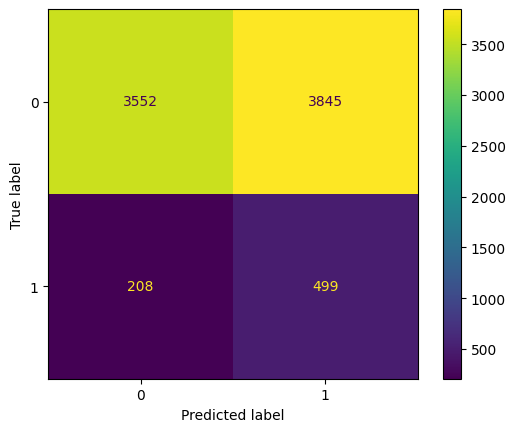

In [59]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);

Com isso, temos um relatório das métricas. Note que, nos dados que representam situações semelhantes ao mundo real, que são desbalanceados e não foram utilizados na etapa de aprimoramento e comparação dos modelos, nós obtivemos um recall de 0.70. Agora, conseguimos identificar 494 clientes inadimplentes.

Essa etapa final de avaliação é crucial para compreender como nosso modelo se comportará com dados do mundo real. Por isso, foi importante separar os dados de teste desde o início do nosso projeto.

Utilizamos a estratégia de undersampling para aprimorar o resultado do nosso modelo, porém existem outras estratégias que podemos aplicar para melhorar seu desempenho.

Além disso, a empresa pode avaliar se o modelo construído será colocado em produção para identificar os clientes inadimplentes e evitar um prejuízo considerável.